In [4]:
import unsupervised_learning
import pandas as pd

In [5]:
query = "SELECT * FROM nfl_player"

In [6]:
df = unsupervised_learning.fetch_data_from_db(query)

Attempt 1 of 3 to connect to the database...
❌ Connection attempt 1 failed: (pyodbc.OperationalError) ('08001', '[08001] [Microsoft][ODBC Driver 18 for SQL Server]TCP Provider: Timeout error [258].  (258) (SQLDriverConnect); [08001] [Microsoft][ODBC Driver 18 for SQL Server]Login timeout expired (0); [08001] [Microsoft][ODBC Driver 18 for SQL Server]Invalid connection string attribute (0); [08001] [Microsoft][ODBC Driver 18 for SQL Server]Unable to complete login process due to delay in login response (258)')
(Background on this error at: https://sqlalche.me/e/20/e3q8)
Retrying in 3 seconds...
Attempt 2 of 3 to connect to the database...
❌ Connection attempt 2 failed: (pyodbc.OperationalError) ('08001', '[08001] [Microsoft][ODBC Driver 18 for SQL Server]TCP Provider: Timeout error [258].  (258) (SQLDriverConnect); [08001] [Microsoft][ODBC Driver 18 for SQL Server]Login timeout expired (0); [08001] [Microsoft][ODBC Driver 18 for SQL Server]Invalid connection string attribute (0); [08001

In [7]:
df

,ID,Player,Until,G,GS,Cmp,PaAtt,Cmp%,PaYds,PaTD,...,Team,MVP,OPOY,DPOY,OROY,DROY,AP1,SB,IG,Wiki
0,1,Israel Abanikanda,2023,6,0,0,0,NaN,0,0,...,NYJ,0,0,0,0,0,0,0,None,48136.0
1,2,Ameer Abdullah,2024,141,26,0,0,NaN,0,0,...,"CAR,DET,LVR,MIN",0,0,0,0,0,0,0,None,118158.0
2,3,Yasir Abdullah,2024,19,3,0,0,NaN,0,0,...,JAX,0,0,0,0,0,0,0,None,9650.0
3,4,Micah Abernathy,2024,20,0,0,0,NaN,0,0,...,"ATL,GNB",0,0,0,0,0,0,0,None,8885.0
4,5,Johnathan Abram,2024,55,39,0,0,NaN,0,0,...,"GNB,LVR,NOR,OAK,SEA",0,0,0,0,0,0,0,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,2696,Ty Zentner,2024,10,0,0,0,NaN,0,0,...,"HOU,LAR,TEN",0,0,0,0,0,0,0,None,NaN
2696,2697,Zak Zinter,2024,17,3,0,0,NaN,0,0,...,CLE,0,0,0,0,0,0,0,None,90207.0
2697,2698,Isaiah Zuber,2020,4,0,0,0,NaN,0,0,...,NWE,0,0,0,0,0,0,0,None,NaN
2698,2699,Greg Zuerlein,2024,192,0,0,0,NaN,0,0,...,"DAL,LAR,NYJ,STL",0,0,0,0,0,0,0,None,NaN


In [8]:
nba_df = pd.read_csv("../nfl.csv")

In [9]:
nba_df = nba_df.loc[:, ~nba_df.columns.str.contains('Unnamed')]

In [10]:
nba_df

,Team,Player,Pageviews
0,Arizona Cardinals,Kyler Murray,845475.0
1,Arizona Cardinals,Clayton Tune,56850.0
2,Arizona Cardinals,Trey Benson,110208.0
3,Arizona Cardinals,Michael Carter,50197.0
4,Arizona Cardinals,James Conner,198361.0
...,...,...,...
2215,Washington Commanders,Bobby Wagner,384744.0
2216,Washington Commanders,Mykal Walker,16624.0
2217,Washington Commanders,Tress Way,66983.0
2218,Washington Commanders,Olamide Zaccheaus,74418.0


In [11]:
df = df.rename(columns={"Player": "Player_df1"})
nba_df = nba_df.rename(columns={"Player": "Player_df2"})

In [12]:
new_merge_df = unsupervised_learning.fuzzy_merge(df, nba_df, "Player_df1", "Player_df2")

In [13]:
new_merge_df.columns

Index(['ID', 'Player_df1', 'Until', 'G', 'GS', 'Cmp', 'PaAtt', 'Cmp%', 'PaYds',
       'PaTD', 'IntO', 'Rate', 'SkO', 'QBWin', 'GWD', 'RuAtt', 'RuYds',
       'RuY/A', 'RuTD', 'RuY/G', 'Tgt', 'Rec', 'RecYds', 'Y/Rec', 'RecTD',
       'RecY/G', 'FG', 'FG%', '2PM', 'Sfty', 'Pts', 'FantPts', 'SkD', 'Solo',
       'Ast', 'TFL', 'QBHit', 'IntD', 'Pick6', 'PaDef', 'Fmb', 'FR', 'Scoop6',
       'FF', 'PntYds', 'Y/Pnt', 'Blck', 'APYd', 'RetYds', 'Pos', 'Team_x',
       'MVP', 'OPOY', 'DPOY', 'OROY', 'DROY', 'AP1', 'SB', 'IG', 'Wiki',
       'Player_df2', 'Match Score', 'Team_y', 'Pageviews'],
      dtype='object')

In [16]:
df = new_merge_df

In [ ]:
# # Define function to compute per-game stats safely (avoid division by zero)
# def per_game(stat, games_played):
#     return stat / games_played if games_played > 0 else 0

# # Apply function to relevant columns
# df['PPG'] = df.apply(lambda row: per_game(row['PTS'], row['G']), axis=1)
# df['APG'] = df.apply(lambda row: per_game(row['AST'], row['G']), axis=1)
# df['RPG'] = df.apply(lambda row: per_game(row['TRB'], row['G']), axis=1)
# df['MPG'] = df.apply(lambda row: per_game(row['MP'], row['G']), axis=1)
# df['FGAPG'] = df.apply(lambda row: per_game(row['FG'], row['G']), axis=1)
# df['2PPG'] = df.apply(lambda row: per_game(row['2P'], row['G']), axis=1)
# df['2PAPG'] = df.apply(lambda row: per_game(row['2PA'], row['G']), axis=1)
# df['3PPG'] = df.apply(lambda row: per_game(row['3P'], row['G']), axis=1)
# df['3PAPG'] = df.apply(lambda row: per_game(row['3PA'], row['G']), axis=1)
# df['FTPG'] = df.apply(lambda row: per_game(row['FT'], row['G']), axis=1)
# df['FTAPG'] = df.apply(lambda row: per_game(row['FTA'], row['G']), axis=1)
# df['SPG'] = df.apply(lambda row: per_game(row['STL'], row['G']), axis=1)
# df['BPG'] = df.apply(lambda row: per_game(row['BLK'], row['G']), axis=1)
# df['TPG'] = df.apply(lambda row: per_game(row['TOV'], row['G']), axis=1)
# df['FPG'] = df.apply(lambda row: per_game(row['PF'], row['G']), axis=1)


KeyError: 'PTS'

In [17]:
df = (df
                .drop(columns=["Player_df2", "Team_x"])
                .rename(columns={'Player_df1': 'Player', 'Team_y': 'Team'})
    )

In [18]:
unmatched_players = df[["Player", "G"]].loc[df["G"].isna()]

In [19]:
display(unmatched_players.style.set_sticky())  # Keeps headers visible while scrolling


,Player,G


In [ ]:
# !pip install --upgrade pip
# !pip install scikit-learn

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [21]:
df.columns

Index(['ID', 'Player', 'Until', 'G', 'GS', 'Cmp', 'PaAtt', 'Cmp%', 'PaYds',
       'PaTD', 'IntO', 'Rate', 'SkO', 'QBWin', 'GWD', 'RuAtt', 'RuYds',
       'RuY/A', 'RuTD', 'RuY/G', 'Tgt', 'Rec', 'RecYds', 'Y/Rec', 'RecTD',
       'RecY/G', 'FG', 'FG%', '2PM', 'Sfty', 'Pts', 'FantPts', 'SkD', 'Solo',
       'Ast', 'TFL', 'QBHit', 'IntD', 'Pick6', 'PaDef', 'Fmb', 'FR', 'Scoop6',
       'FF', 'PntYds', 'Y/Pnt', 'Blck', 'APYd', 'RetYds', 'Pos', 'MVP', 'OPOY',
       'DPOY', 'OROY', 'DROY', 'AP1', 'SB', 'IG', 'Wiki', 'Match Score',
       'Team', 'Pageviews'],
      dtype='object')

In [ ]:
# df = pd.get_dummies(df, columns=['Team'], drop_first=True)

In [22]:
df_cols = list(df.columns)
df_cols = list(set(df_cols) - set(['Wiki', 'Match Score', 'Until', 'ID', 'Player', 'Team', "Pos", "IG"]))

In [23]:
df_cols

['Y/Pnt',
 'Cmp%',
 'RecYds',
 'PaYds',
 'Pick6',
 'OROY',
 'Rec',
 'Pageviews',
 'Sfty',
 'FF',
 'Pts',
 'DROY',
 'Ast',
 'FR',
 'PaDef',
 'Blck',
 'RuY/G',
 'GWD',
 'FG%',
 'Scoop6',
 'RetYds',
 'DPOY',
 'Tgt',
 'RuAtt',
 'PntYds',
 'AP1',
 'TFL',
 'Y/Rec',
 'Cmp',
 'PaTD',
 'SkD',
 'MVP',
 'QBWin',
 'APYd',
 'OPOY',
 'Rate',
 'GS',
 'RecY/G',
 'SB',
 'IntO',
 'FantPts',
 'SkO',
 'PaAtt',
 'FG',
 'IntD',
 'RecTD',
 'QBHit',
 'Fmb',
 'RuTD',
 'RuY/A',
 'Solo',
 '2PM',
 'G',
 'RuYds']

In [24]:
# df.dropna(inplace=True)
df.fillna(df.median(), inplace=True)

C:\Users\Blair\AppData\Local\Temp\ipykernel_18104\2105182659.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


In [25]:
df.isnull().sum().to_csv("missing_values.csv")

In [26]:
df_cols

['Y/Pnt',
 'Cmp%',
 'RecYds',
 'PaYds',
 'Pick6',
 'OROY',
 'Rec',
 'Pageviews',
 'Sfty',
 'FF',
 'Pts',
 'DROY',
 'Ast',
 'FR',
 'PaDef',
 'Blck',
 'RuY/G',
 'GWD',
 'FG%',
 'Scoop6',
 'RetYds',
 'DPOY',
 'Tgt',
 'RuAtt',
 'PntYds',
 'AP1',
 'TFL',
 'Y/Rec',
 'Cmp',
 'PaTD',
 'SkD',
 'MVP',
 'QBWin',
 'APYd',
 'OPOY',
 'Rate',
 'GS',
 'RecY/G',
 'SB',
 'IntO',
 'FantPts',
 'SkO',
 'PaAtt',
 'FG',
 'IntD',
 'RecTD',
 'QBHit',
 'Fmb',
 'RuTD',
 'RuY/A',
 'Solo',
 '2PM',
 'G',
 'RuYds']

In [27]:
# Select relevant features
features = df[df_cols]


In [ ]:
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)

In [28]:
# Define numerical features (including Pageviews)
features = df_cols

# Apply StandardScaler to ALL numerical features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Now, apply a custom weight ONLY to Pageviews after scaling
# df['Pageviews'] *= 1.9  # Increase its importance
# df['Pageviews'] *= 3.2  # Increase its importance
# df['Pageviews'] *= 2.92  # Increase its importance
# df['GS'] *= 1.23  # Increase its importance

# Prepare the final feature set for K-Means
scaled_features = df[features].values

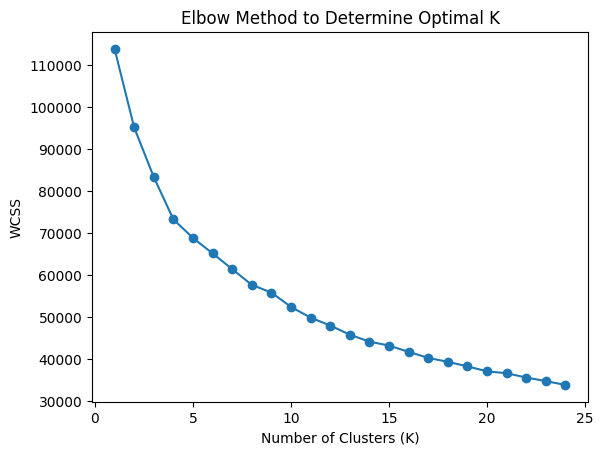

In [29]:
wcss = []  # Within-cluster sum of squares

for k in range(1, 25):  # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=23, n_init=50)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 25), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

In [30]:
kmeans = KMeans(n_clusters=10, random_state=23, n_init=50)
# kmeans = KMeans(n_clusters=6, random_state=23, n_init=50)
df['cluster'] = kmeans.fit_predict(scaled_features)

In [31]:
print(df.groupby('cluster').mean())

                  ID         G        GS        Cmp      PaAtt      Cmp%  \
cluster                                                                    
0        1261.278689  1.247613  1.507241  -0.137682  -0.137556 -0.984572   
1        1214.125000  2.651262  3.708907  12.232352  12.214858  0.299661   
2        1334.293739 -0.269888 -0.300951  -0.117206  -0.116677  0.017655   
3        1111.378378  2.081519  2.490770  -0.139299  -0.139809  0.048793   
4        1094.833333  2.870359 -0.731785  -0.138203  -0.138400 -0.463141   
5        1078.428571  2.570834 -0.731785  -0.127084  -0.127427  1.781270   
6        1292.905000  1.053461  1.255848  -0.139282  -0.139798  0.071708   
7        1470.814815  0.419512  0.901340   4.222824   4.214720  0.288784   
8        1027.000000  1.169352  1.864045   6.320575   6.252808  0.338413   
9        1360.652174  0.492486  0.508189  -0.138370  -0.138844 -0.177733   

             PaYds       PaTD       IntO      Rate  ...      OPOY      DPOY  \
cluster 

C:\Users\Blair\AppData\Local\Temp\ipykernel_18104\3422288698.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('cluster').mean())


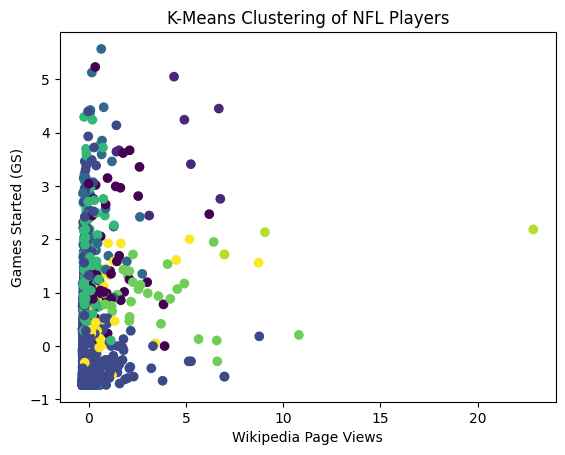

In [ ]:
plt.scatter(df['Pageviews'], df['GS'], c=df['cluster'], cmap='viridis')
plt.xlabel('Wikipedia Page Views')
plt.ylabel('Games Started (GS)')
plt.title('K-Means Clustering of NFL Players')
plt.show()


In [ ]:
for cluster in sorted(df['cluster'].unique()):
    print(f"\nCluster {cluster}:")
    print(df[df['cluster'] == cluster][['Player', 'Pageviews']].head(10))  # Show top 10 players per cluster



Cluster 0:
              Player  Pageviews
6      Davante Adams   2.602082
17    Nelson Agholor   0.314409
21     Brandon Aiyuk   1.815278
39      Keenan Allen   0.956940
62      Mark Andrews  -0.293367
196  Kendrick Bourne  -0.083105
201       Tyler Boyd   0.191651
244       A.J. Brown   1.092885
254   Marquise Brown   0.918135
335         DJ Chark  -0.022631

Cluster 1:
                Player  Pageviews
316         Derek Carr   1.545108
397       Kirk Cousins   5.245374
421        Andy Dalton   1.413965
608         Joe Flacco   4.911850
697         Jared Goff   6.761658
1531      Dak Prescott   3.101325
1750  Matthew Stafford   4.380289
2052    Russell Wilson   6.685526

Cluster 2:
                Player  Pageviews
0    Israel Abanikanda  -0.203894
2       Yasir Abdullah  -0.313916
3      Micah Abernathy  -0.316103
4   Kris Abrams-Draine  -0.282104
7         Isaiah Adams  -0.283513
8        Matthew Adams  -0.310308
9     Montravius Adams  -0.288173
10         Myles Adams  -0.304331


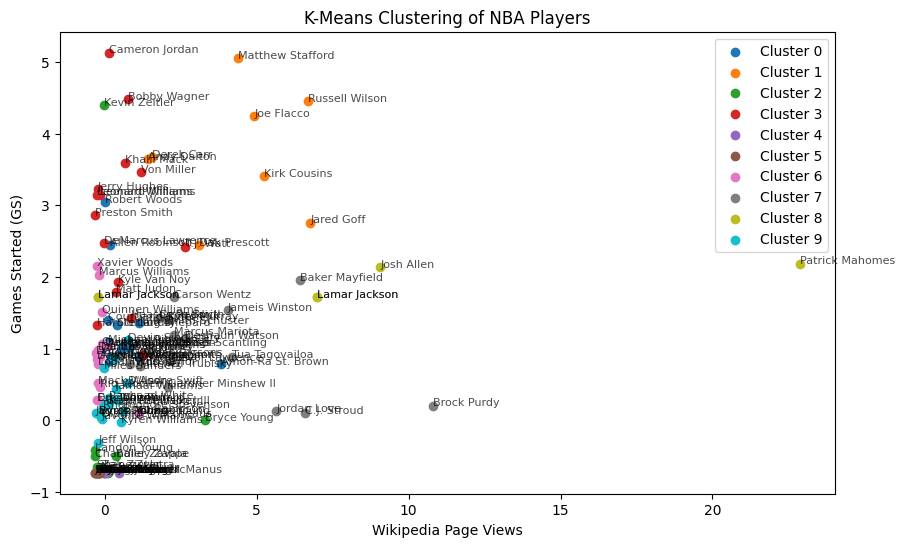

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot
for cluster in sorted(df['cluster'].unique()):
    subset = df[df['cluster'] == cluster].tail(15)
    plt.scatter(subset['Pageviews'], subset['GS'], label=f'Cluster {cluster}')

    # Annotate player names
    for _, row in subset.iterrows():
        plt.annotate(row['Player'], (row['Pageviews'], row['GS']), fontsize=8, alpha=0.7)

# # Annotate player names
# for _, row in df.iterrows():
#     plt.annotate(row['Player'], (row['Pageviews'], row['PTS']), fontsize=8, alpha=0.7)


plt.xlabel("Wikipedia Page Views")
plt.ylabel("Games Started (GS)")
plt.title("K-Means Clustering of NBA Players")
plt.legend()
plt.show()


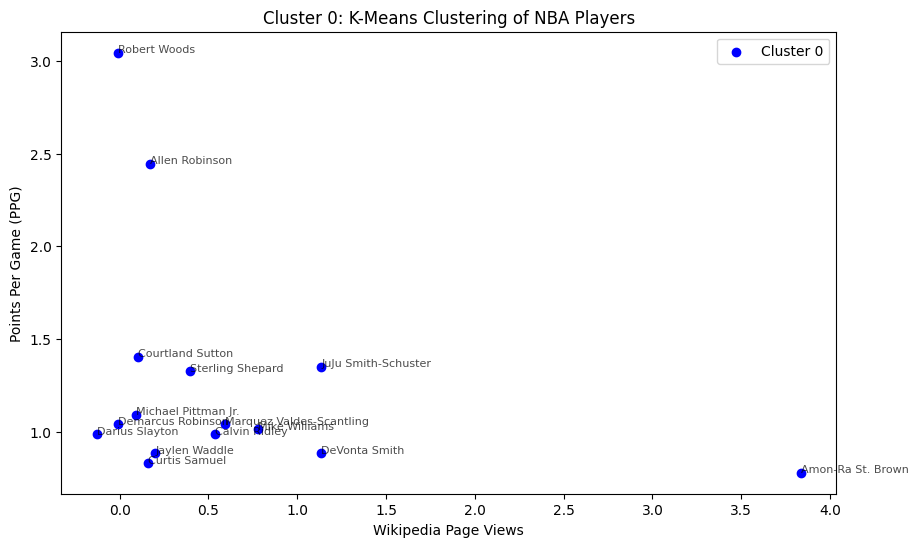

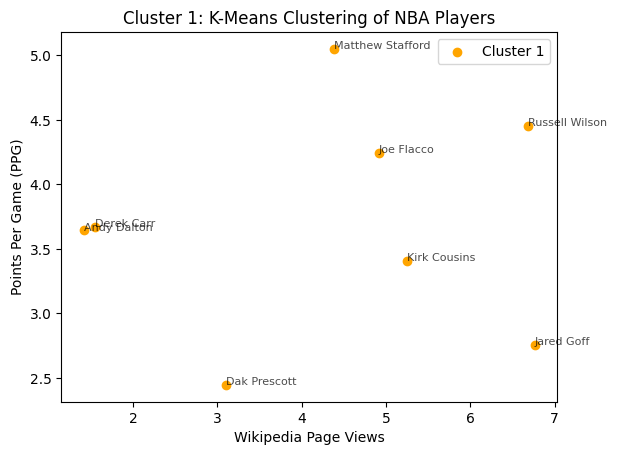

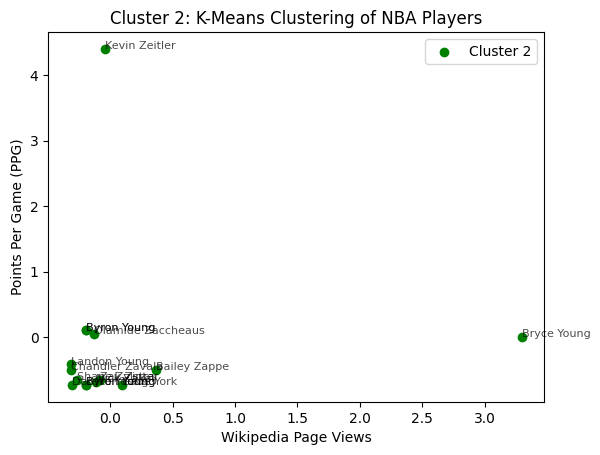

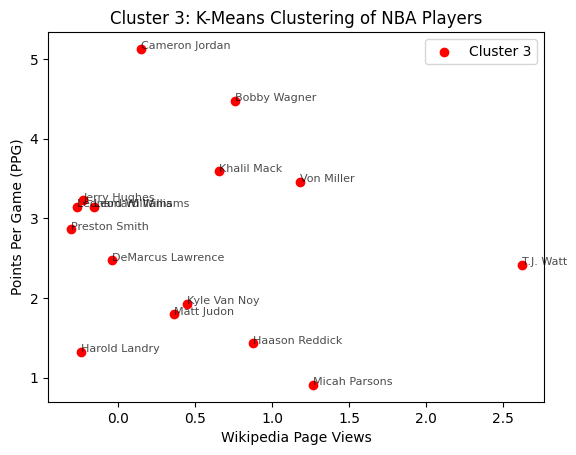

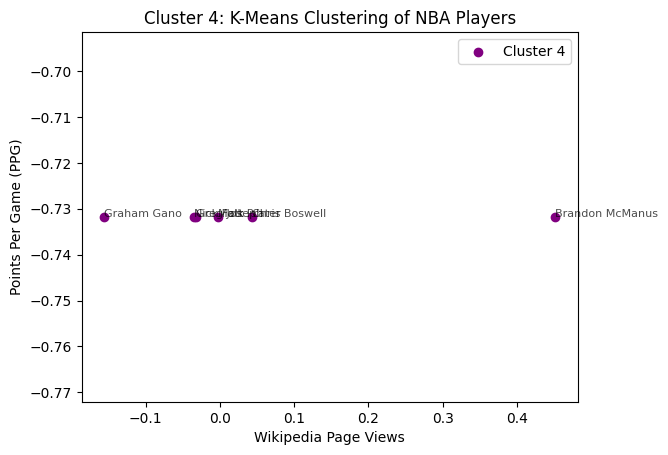

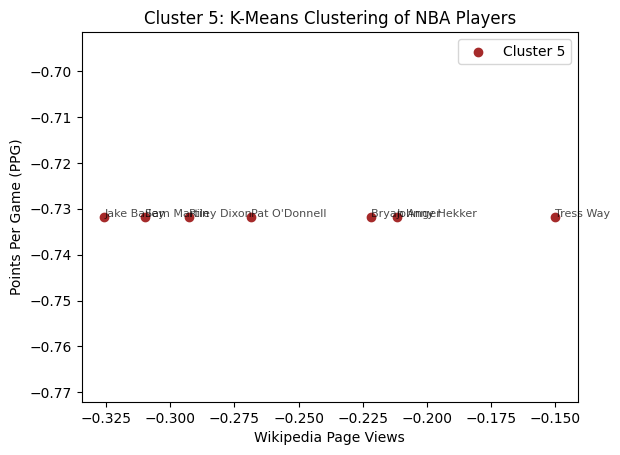

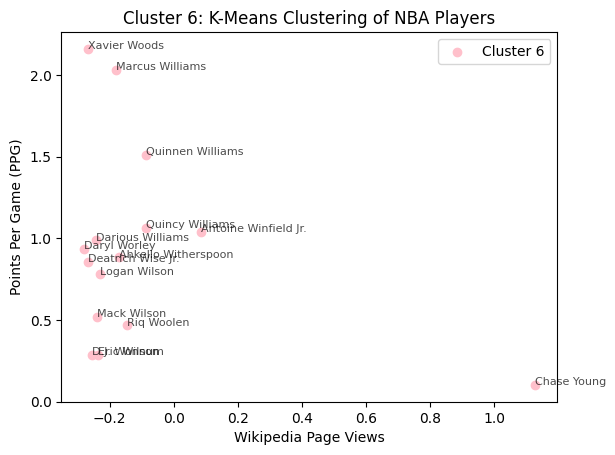

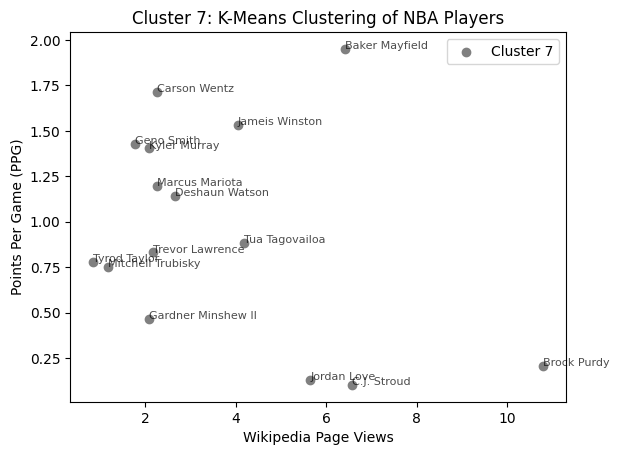

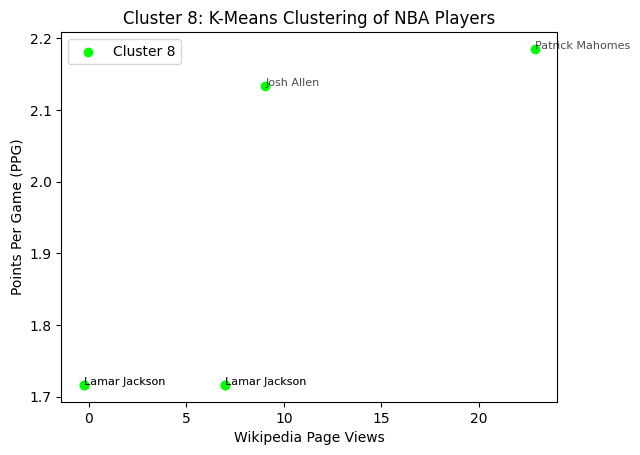

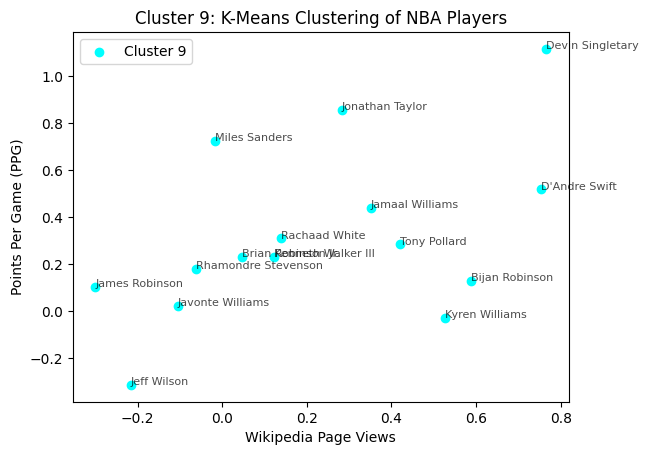

In [33]:
plt.figure(figsize=(10, 6))

color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "lime",
    "cyan"
]

for cluster_num in range(10):

    subset = df[df['cluster'] == cluster_num].tail(15)

    plt.scatter(subset['Pageviews'], subset['GS'], label=f"Cluster {cluster_num}", color=color_list[cluster_num])

    for _, row in subset.iterrows():
        plt.annotate(row['Player'], (row['Pageviews'], row['GS']), fontsize=8, alpha=0.7)

    plt.xlabel("Wikipedia Page Views")
    plt.ylabel("Points Per Game (PPG)")
    plt.title(f"Cluster {cluster_num}: K-Means Clustering of NBA Players")
    plt.legend()
    plt.show()


In [34]:
# Find the average stats per cluster (fix this after normalization)
cluster_means = df.groupby('cluster')[['GS', 'Pageviews']].median()
print(cluster_means)


               GS  Pageviews
cluster                     
0        1.091373   0.349092
1        3.656816   4.646069
2       -0.601559  -0.271215
3        2.237358   0.183698
4       -0.731785  -0.017778
5       -0.731785  -0.268653
6        1.052305  -0.171491
7        0.961147   2.547734
8        1.716456   6.973458
9        0.257929   0.418941


In [35]:
from scipy.spatial.distance import euclidean

# Find the centroid of the most "popular" cluster (highest Pageviews)
superstar_cluster = cluster_means['Pageviews'].idxmax()
superstar_centroid = cluster_means.loc[superstar_cluster].values

# Compute distance of each player from the superstar cluster
df['Obscurity_Score'] = df.apply(
    lambda row: euclidean(
        row[['GS', 'Pageviews']].values,
        superstar_centroid
    ), axis=1
)

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 100))
df['Obscurity_Score'] = scaler.fit_transform(df[['Obscurity_Score']])

# Higher score = More obscure player
df = df.sort_values(by='Obscurity_Score', ascending=False)


In [39]:
print(df[['Player', 'Pageviews', 'GS', 'Obscurity_Score']].tail(25))


                   Player  Pageviews        GS  Obscurity_Score
1749    Amon-Ra St. Brown   3.836434  0.778832        20.590800
608            Joe Flacco   4.911850  4.242831        20.506828
2060       Jameis Winston   4.045081  1.534140        18.451925
1792       Tua Tagovailoa   4.185935  0.883012        18.297250
2052       Russell Wilson   6.685526  4.451192        17.293547
1402               Bo Nix   5.134657 -0.289018        17.111255
1994       Caleb Williams   5.255008 -0.289018        16.609119
288            Joe Burrow   4.545402  1.065328        15.809325
106        Saquon Barkley   4.491237  1.612275        15.624179
397          Kirk Cousins   5.245374  3.409388        15.213800
1461       Jonathan Owens   8.766759  0.179794        14.852002
942         Lamar Jackson   6.973458 -0.575514        14.413968
940         Lamar Jackson   6.973458 -0.575514        14.413968
429           Sam Darnold   4.908000  1.169508        13.437172
38             Josh Allen   9.057993  2.

In [ ]:
print(df[['Player', 'Pageviews', 'PPG', 'Obscurity_Score']].head(25))

                 Player  Pageviews       PPG  Obscurity_Score
224      Daniss Jenkins  -1.535591 -1.520138       100.000000
243       Spencer Jones  -1.534877 -1.453080        99.919336
107         RayJ Dennis  -1.507774 -1.408375        99.891860
96      Isaiah Crawford  -1.514312 -1.408375        99.815813
292       Jaylen Martin  -1.481312 -1.352493        99.805283
120          Alex Ducas  -1.495075 -1.296612        99.770964
48        Jalen Bridges  -1.444280 -1.478227        99.676820
321         Riley Minix  -1.477090 -1.520138        99.674037
394        Liam Robbins  -1.462172 -1.404077        99.656360
138        Adam Flagler  -1.448824 -1.331538        99.619684
178     Elijah Harkless  -1.552676 -1.017204        99.568200
240         Isaac Jones  -1.474400 -0.941001        99.504374
78         Max Christie  -1.564493 -0.677352        99.490221
5        Trey Alexander  -1.394015 -1.376443        99.478719
466       Stanley Umude  -1.476592 -0.954337        99.472741
236     

In [ ]:
df.to_csv("players_with_obscurity_scores.csv", index=False)

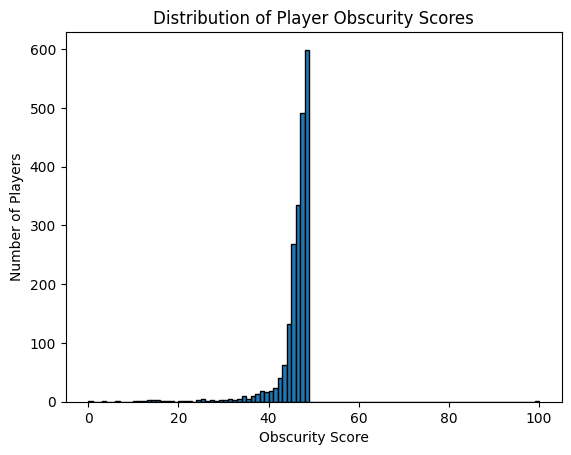

In [40]:
import matplotlib.pyplot as plt

plt.hist(df['Obscurity_Score'], bins=100, edgecolor='black')
plt.xlabel("Obscurity Score")
plt.ylabel("Number of Players")
plt.title("Distribution of Player Obscurity Scores")
plt.show()
